In [1]:
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D
from tensorflow.keras import Model,Sequential
from tensorflow.keras import datasets
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from matplotlib import pyplot as plt

In [2]:
np.set_printoptions(threshold=np.inf)

------load the model-----
Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 17s 349us/sample - loss: 1.4291 - sparse_categorical_accuracy: 0.4832 - val_loss: 1.4068 - val_sparse_categorical_accuracy: 0.4920
Epoch 2/5
50000/50000 [==============================] - 20s 399us/sample - loss: 1.3834 - sparse_categorical_accuracy: 0.5009 - val_loss: 1.3674 - val_sparse_categorical_accuracy: 0.5050
Epoch 3/5
50000/50000 [==============================] - 20s 399us/sample - loss: 1.3481 - sparse_categorical_accuracy: 0.5146 - val_loss: 1.3279 - val_sparse_categorical_accuracy: 0.5225
Epoch 4/5
50000/50000 [==============================] - 20s 397us/sample - loss: 1.3097 - sparse_categorical_accuracy: 0.5293 - val_loss: 1.3104 - val_sparse_categorical_accuracy: 0.5269
Epoch 5/5
50000/50000 [==============================] - 20s 398us/sample - loss: 1.2816 - sparse_categorical_accuracy: 0.5408 - val_loss: 1.2991 - val_sparse_categorical_a

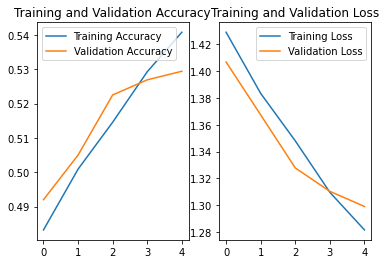

In [3]:
cifar10 = datasets.cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

class LeNet5(Model):
    def __init__(self):
        super(LeNet5,self).__init__()
        # 1
        self.c1 = Conv2D(filters=6,kernel_size=(5,5),activation="sigmoid")
        self.p1 = MaxPool2D(pool_size=(2,2),strides=2)
        # 2
        self.c2 = Conv2D(filters=16,kernel_size=(5,5),activation="sigmoid")
        self.p2 = MaxPool2D(pool_size=(2,2),strides=2)
        
        self.flatten = Flatten()
        # 3
        self.f1 = Dense(120,activation="sigmoid")
        # 4
        self.f2 = Dense(84,activation="sigmoid")
        # 5
        self.f3 = Dense(10,activation="softmax")
    def call(self,x):
        x = self.c1(x)
        x = self.p1(x)
        x = self.c2(x)
        x = self.p2(x)
        x = self.flatten(x)
        x = self.f1(x)
        x = self.f2(x)
        y = self.f3(x)
        return y
model = LeNet5()

model.compile(optimizer="adam",
              loss=SparseCategoricalCrossentropy(from_logits=False),
              metrics=["sparse_categorical_accuracy"])

checkpoint_save_path = "./chenkpoint/LeNet5.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print("------load the model-----")
    model.load_weights(checkpoint_save_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                 save_weights_only=True,
                                                 save_best_only=True)

history = model.fit(x_train, y_train, batch_size=32, epochs=5, 
                    validation_data=(x_test, y_test), 
                    validation_freq=1,
                    callbacks=[cp_callback])
model.summary()

print("保存权重")
with open('./weights.txt','w') as f:
    for v in model.trainable_variables:
        f.writelines(str(v.name))
        f.writelines(str(v.shape))
        f.writelines(str(v.numpy()))

acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1,2,1)
plt.plot(acc,label="Training Accuracy")
plt.plot(val_acc,label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(loss,label="Training Loss")
plt.plot(val_loss,label="Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()

plt.show()